In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e11/sample_submission.csv
/kaggle/input/playground-series-s4e11/train.csv
/kaggle/input/playground-series-s4e11/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

## Data import and initial observations

In [4]:
# To see how the data looks from an outer galnce
train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [5]:
# Data type information, memory usage, no.of rows of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [6]:
# Statistics of numerical columns in the dataset
train.describe(include='number')

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [7]:
# Statistics of categorical columns in the dataset
train.describe(include='object')

,Name,Gender,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
count,140700,140700,140700,140700,104070,140700,140696,140698,140700,140700
unique,422,2,98,2,64,36,23,115,2,2
top,Rohan,Male,Kalyan,Working Professional,Teacher,Less than 5 hours,Moderate,Class 12,No,No
freq,3178,77464,6591,112799,24906,38784,49705,14729,71138,70758


## Analysis of missing values

In [8]:
numerical_columns = train.select_dtypes(include='number').drop(['id', 'Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Financial Stress'], axis=1).columns

X = train.select_dtypes(include='object').drop(['Name'], axis=1).columns
additional = set(['Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Financial Stress', 'Depression'])
categorical_columns = list(set(X).union(additional))

In [9]:
# To find the no.of missing entries in each column
train.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

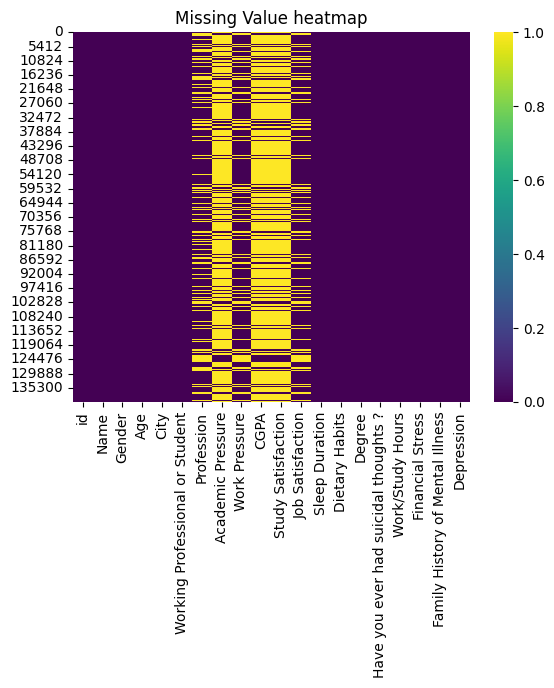

In [10]:
# Visualize those missing entries
sns.heatmap(train.isnull(), cbar=True, cmap='viridis')
plt.title('Missing Value heatmap')
plt.show()

<Axes: >

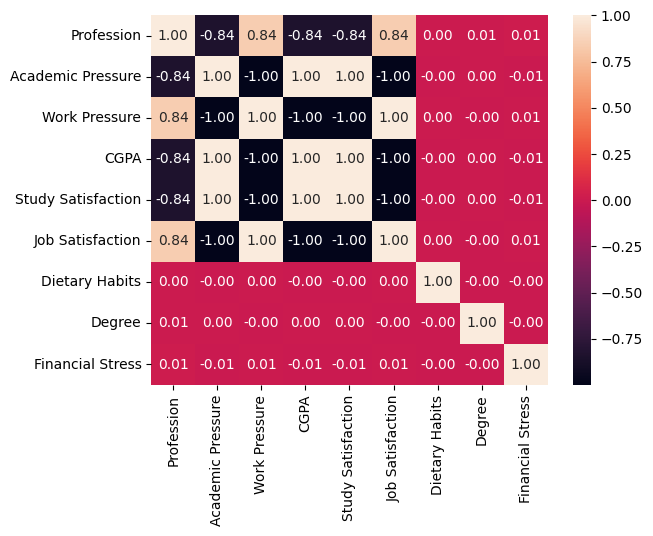

In [11]:
# Visualization of correlation of missing values of various columns
sns.heatmap(train[train.columns[train.isnull().any()]].isnull().corr(), annot=True, fmt='.2f')

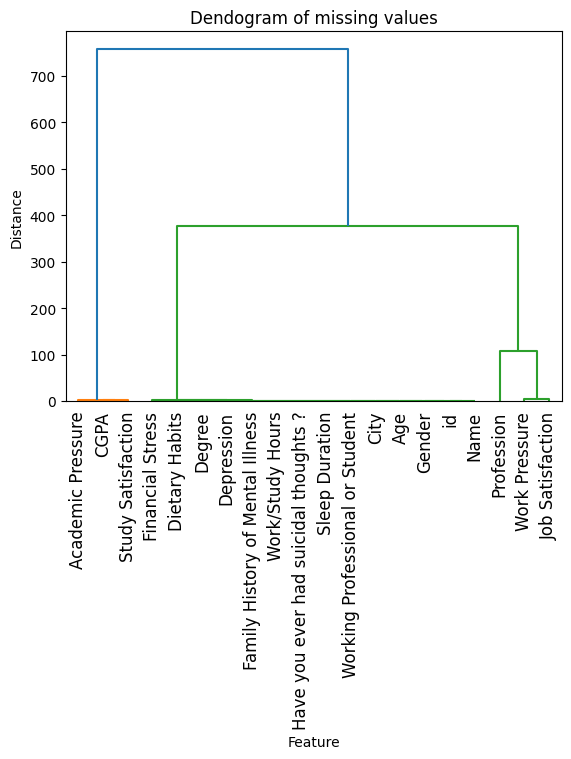

In [12]:
# Dendogram of missing values to cluster columns / features having same missing value similarities / patterns
from scipy.cluster.hierarchy import dendrogram , linkage

linkage_matrix = linkage(train.isnull().T, method='ward')

dendrogram(linkage_matrix, labels=train.columns, leaf_rotation=90)
plt.title('Dendogram of missing values')
plt.xlabel('Feature')
plt.ylabel('Distance')
plt.show()

## Univariate Analysis

In [13]:
train.replace([np.inf, -np.inf], np.nan, inplace=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

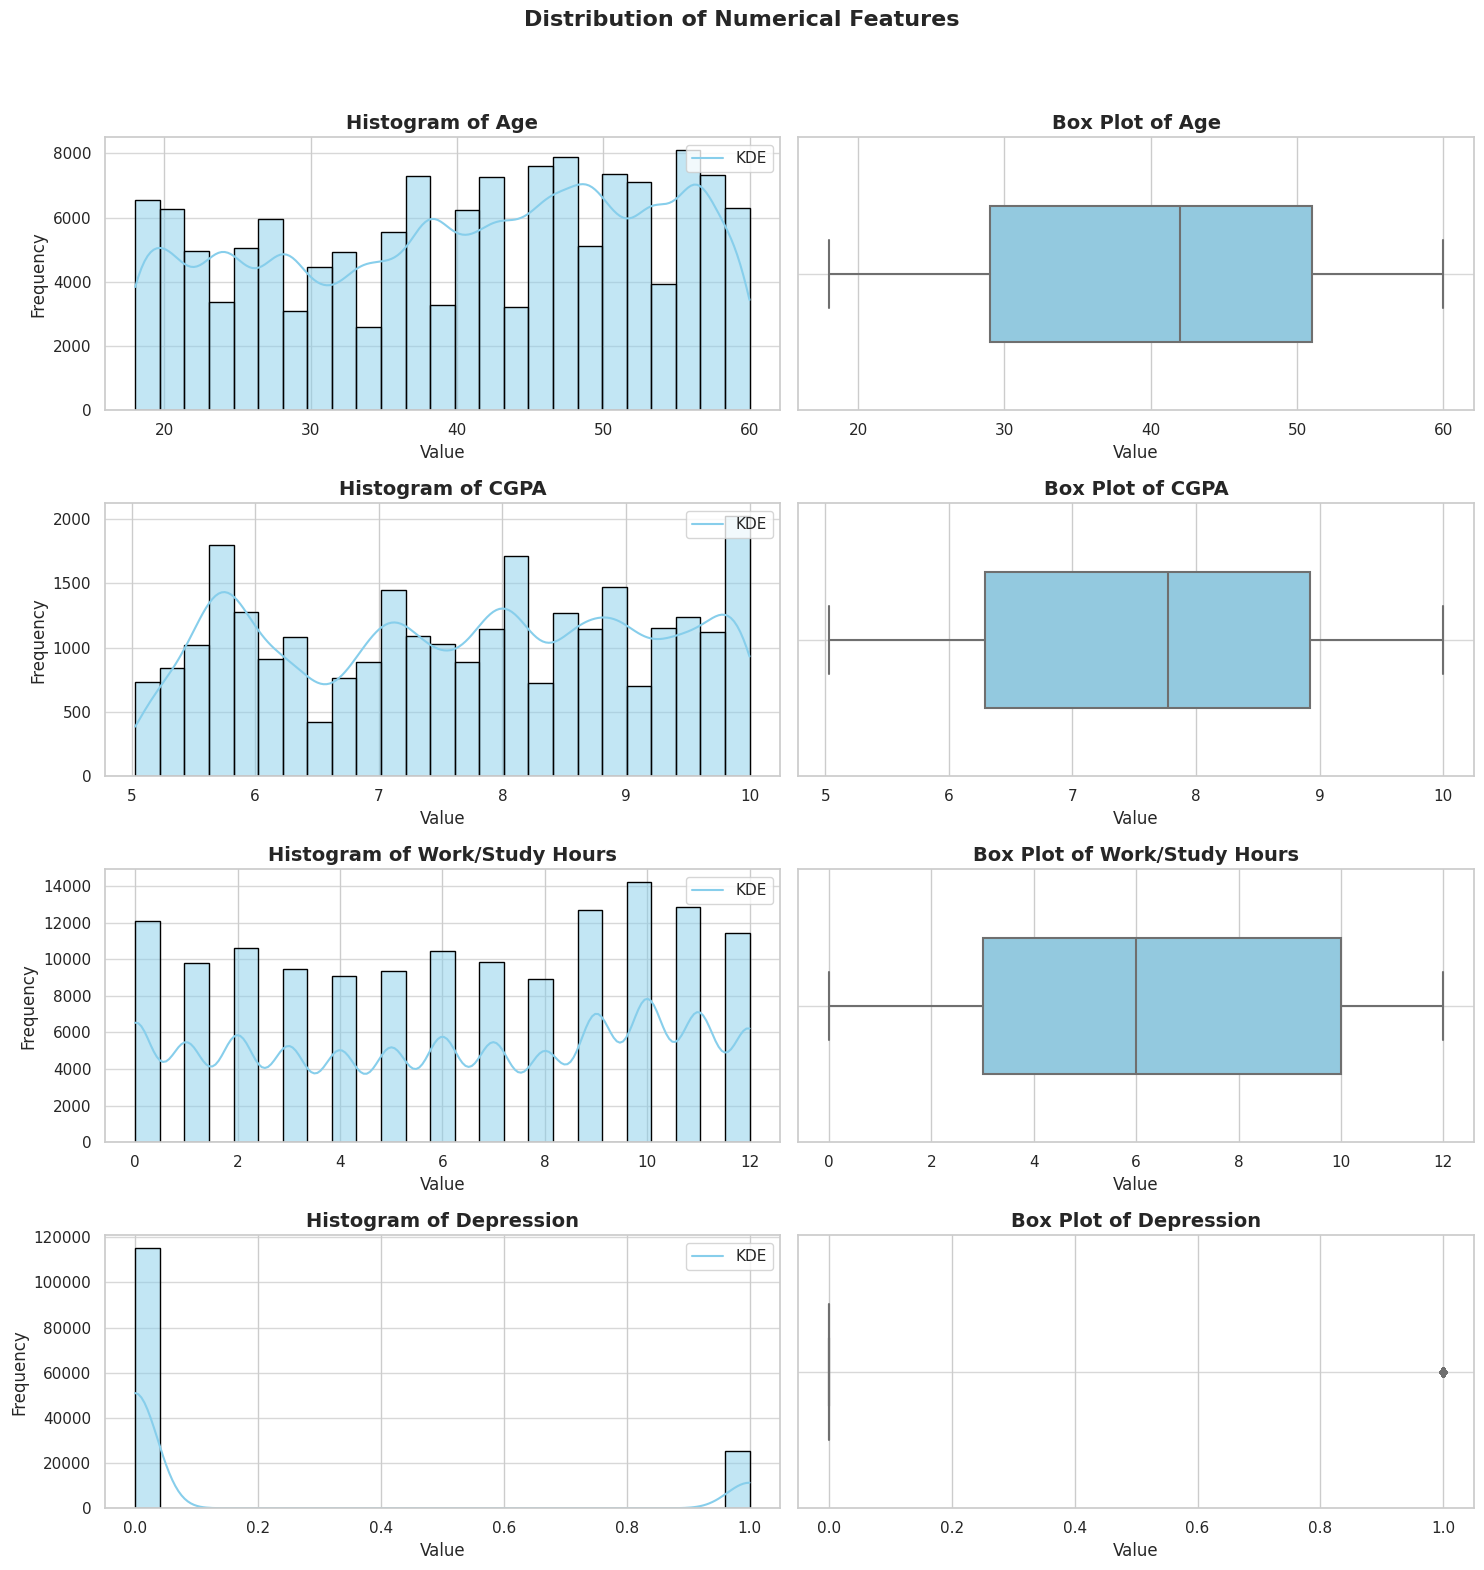

In [14]:
# Histogram plot of numerical columns to understand the distribution, central tendency and dispersion
# Box plots to visualize the distribution in a more optimized way giving the quartile distribution of each column and outliers clearly
sns.set(style='whitegrid', palette='muted')

fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(15, len(numerical_columns) * 4))
fig.suptitle('Distribution of Numerical Features', fontsize=16, weight='bold')

for i, col in enumerate(numerical_columns):
    # Histogram
    train[col] = train[col].replace([np.inf, -np.inf], np.nan)
    sns.histplot(train[col], kde=True, ax=axes[i, 0], color='skyblue', bins=25, edgecolor='black')
    axes[i, 0].set_title(f'Histogram of {col}', fontsize=14, weight='bold')
    axes[i, 0].set_xlabel('Value', fontsize=12)
    axes[i, 0].set_ylabel('Frequency', fontsize=12)
    axes[i, 0].grid(axis='y', alpha=0.75)  
    axes[i, 0].legend(['KDE'], loc='upper right')

# Box Plot
    sns.boxplot(x=train[col], ax=axes[i, 1], color='skyblue', width=0.5)
    axes[i, 1].set_title(f'Box Plot of {col}', fontsize=14, weight='bold')
    axes[i, 1].set_xlabel('Value', fontsize=12)
    axes[i, 1].grid(axis='y', alpha=0.75)  

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

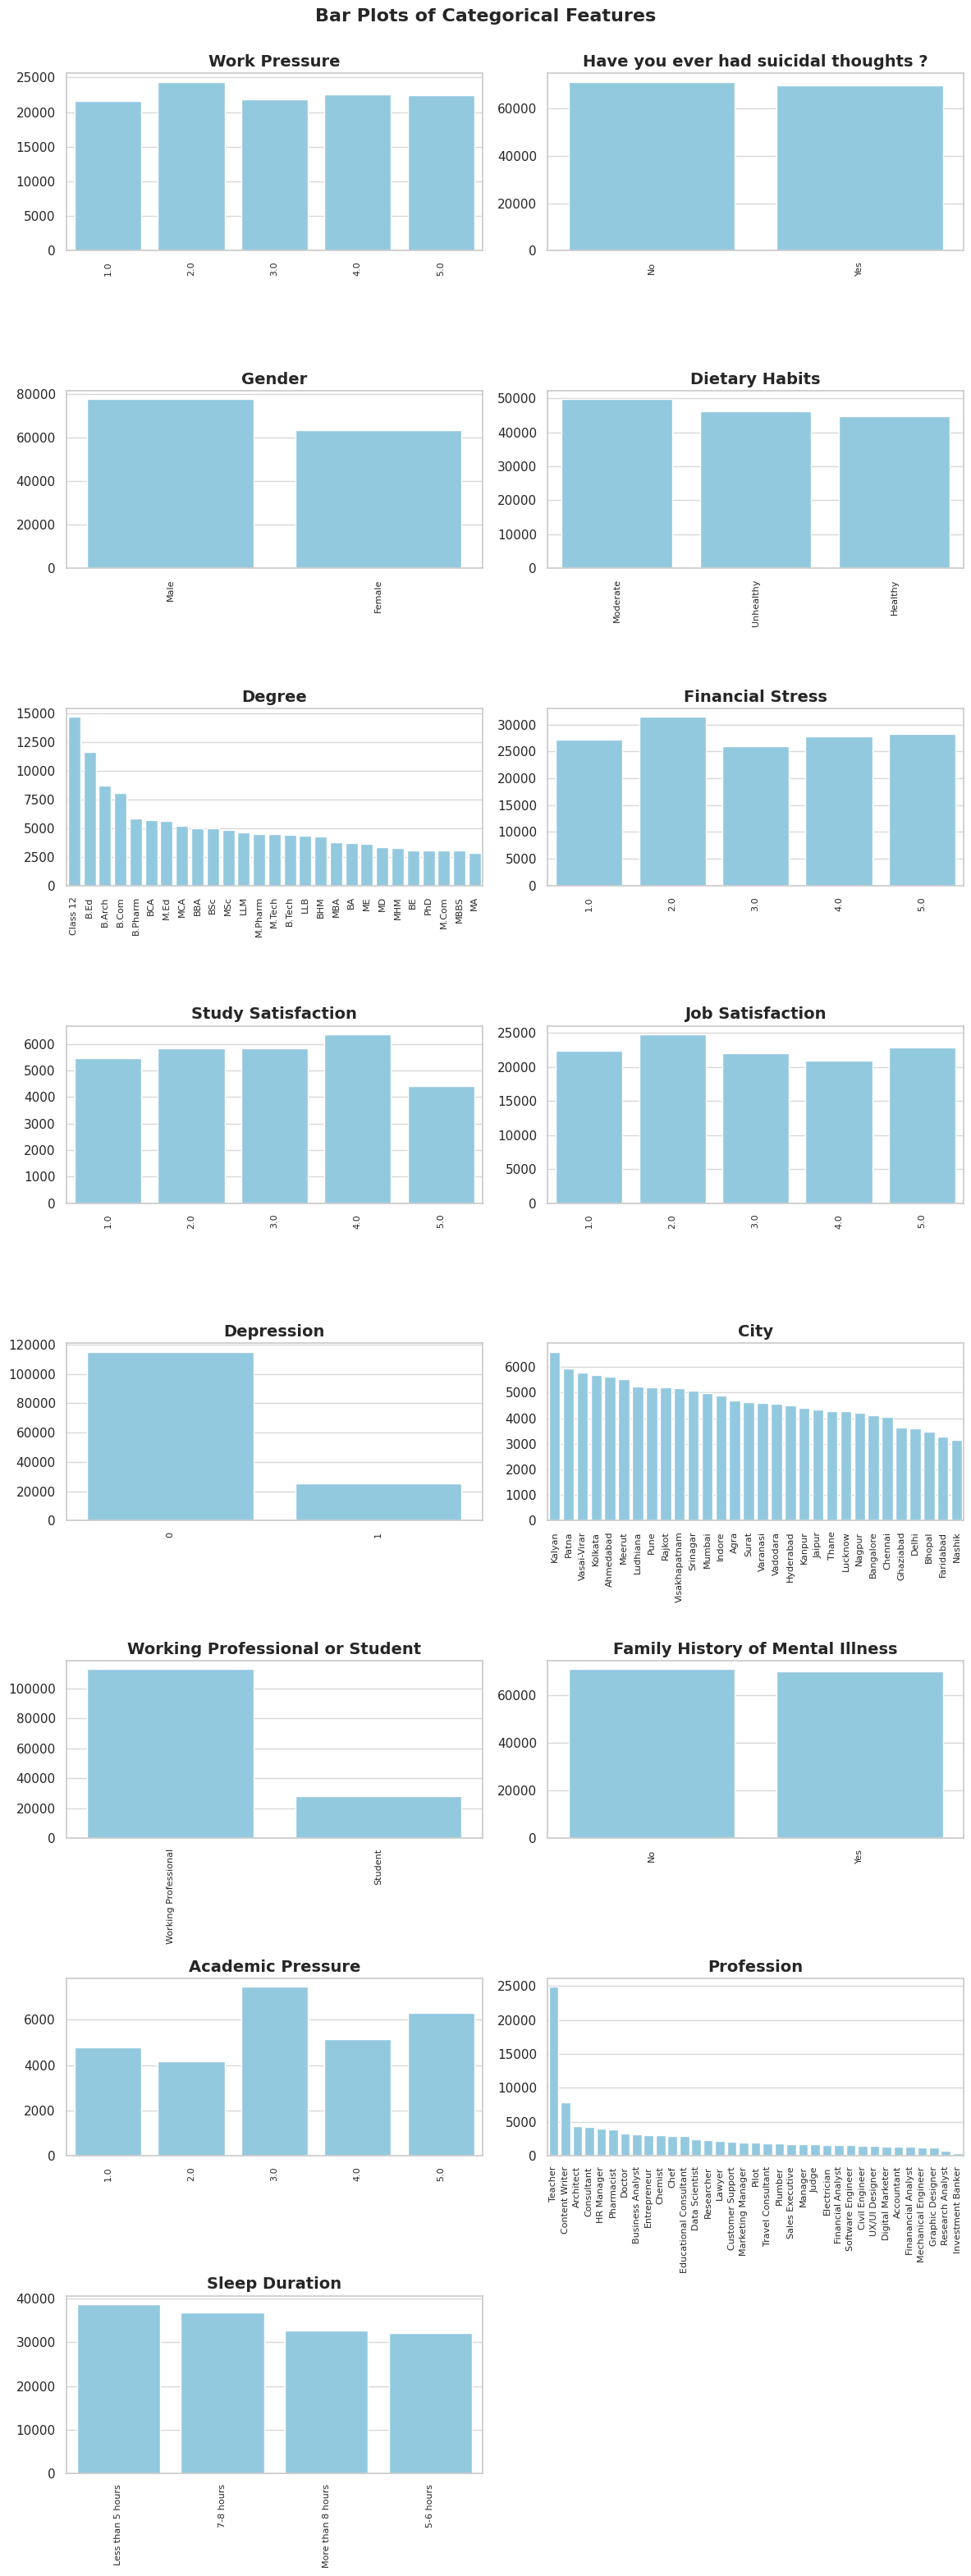

In [15]:
# Bar plots for categorical variables distribution
sns.set(style='whitegrid', palette='muted')

valid_columns = []  
for col in categorical_columns:
    count_data = train[col].value_counts()
    
    filtered_data = count_data[count_data > 50]
    if not filtered_data.empty:
        valid_columns.append((col, filtered_data))

num_plots = len(valid_columns)
fig, axes = plt.subplots(nrows=(num_plots + 1) // 2, ncols=2, figsize=(12, (num_plots // 2 + 1) * 4))
fig.suptitle('Bar Plots of Categorical Features', fontsize=16, weight='bold')

for i, (col, filtered_data) in enumerate(valid_columns):
    row, col_pos = divmod(i, 2)  
    sns.barplot(x=filtered_data.index, y=filtered_data.values, ax=axes[row, col_pos], color='skyblue')
    axes[row, col_pos].set_title(f'{col}', fontsize=14, weight='bold')
    axes[row, col_pos].grid(axis='y', alpha=0.75)
    axes[row, col_pos].set_xlabel('')
    axes[row, col_pos].tick_params(axis='x', rotation=90, labelsize=8)  # Rotate x labels for better readability

for j in range(num_plots, (num_plots + 1) // 2 * 2):
    axes[j // 2, j % 2].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

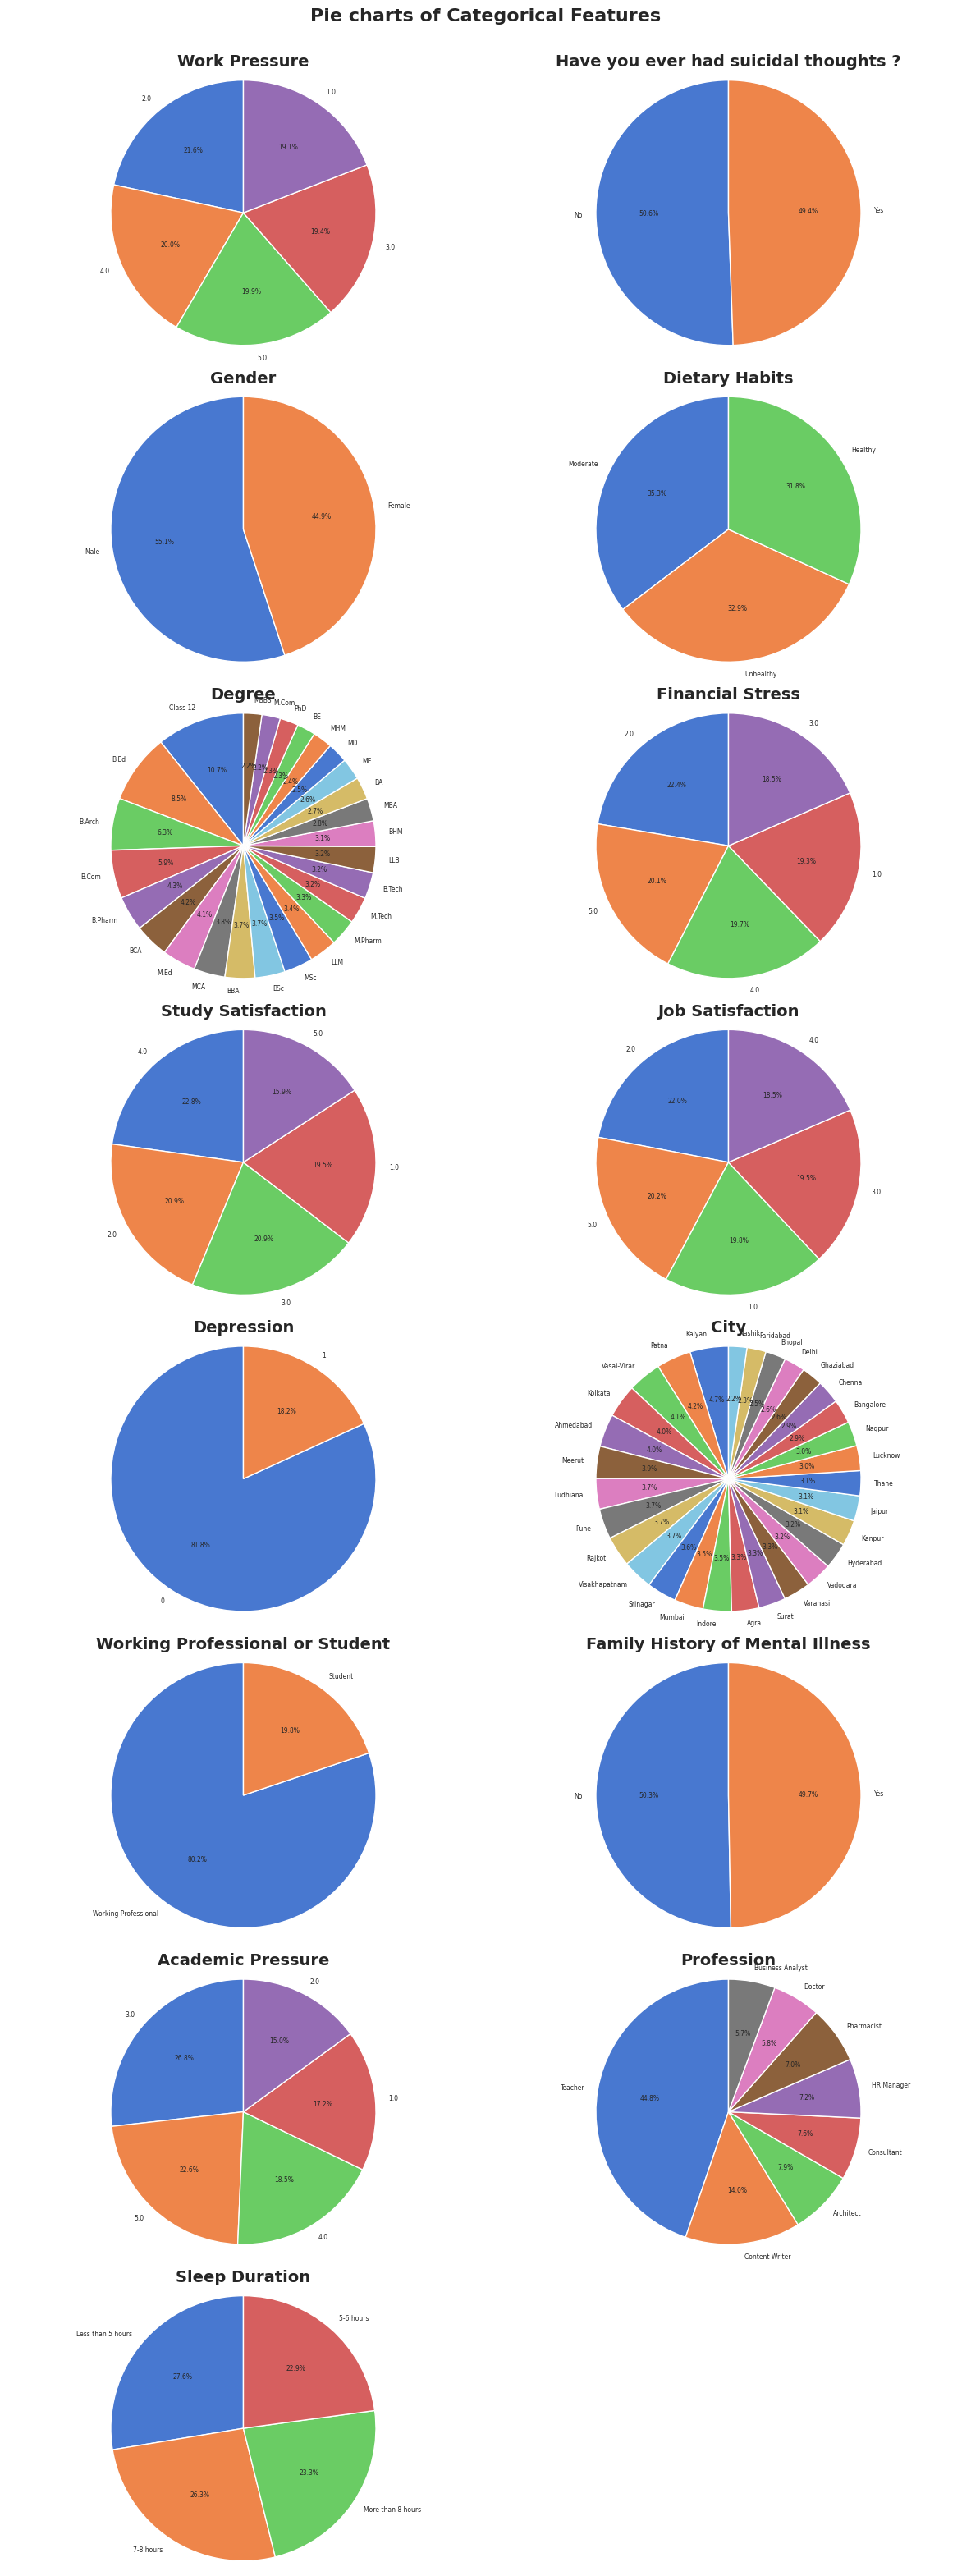

In [16]:
# Pie charts also visualize the proportion of categories in categorical variables
sns.set(style='whitegrid', palette='muted')

valid_columns = []  
for col in categorical_columns:
    count_data = train[col].value_counts()
    
    filtered_data = count_data[count_data > 3000]
    if not filtered_data.empty:
        valid_columns.append((col, filtered_data))

num_plots = len(valid_columns)
fig, axes = plt.subplots(nrows=(num_plots + 1) // 2, ncols=2, figsize=(12, (num_plots // 2 + 1) * 4))
fig.suptitle('Pie charts of Categorical Features', fontsize=16, weight='bold')

for i, (col, filtered_data) in enumerate(valid_columns):
    row, col_pos = divmod(i, 2)
    axes[row, col_pos].pie(filtered_data, labels=filtered_data.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 5.5})
    axes[row, col_pos].axis('equal')
    axes[row, col_pos].set_title(f'{col}', fontsize=14, weight='bold')

for j in range(num_plots, (num_plots + 1) // 2 * 2):
    axes[j // 2, j % 2].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## Bivariate Analysis and Multivariate analysis

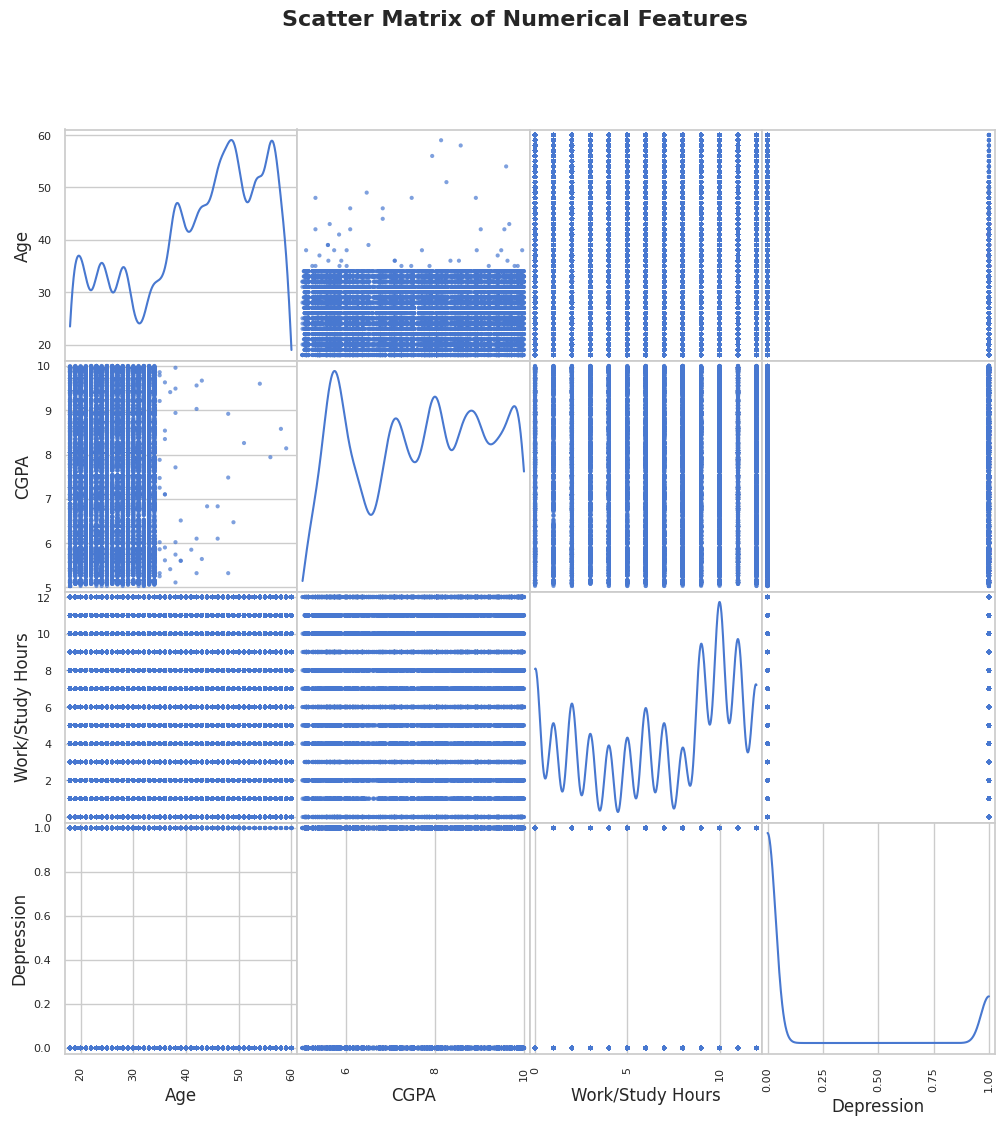

In [17]:
# Scatter plot of numerical and numerical columns to see the relationship / trend between the variables
pd.plotting.scatter_matrix(train[numerical_columns], figsize=(12, 12), diagonal='kde', alpha=0.7)
plt.suptitle('Scatter Matrix of Numerical Features', fontsize=16, weight='bold')
plt.show()

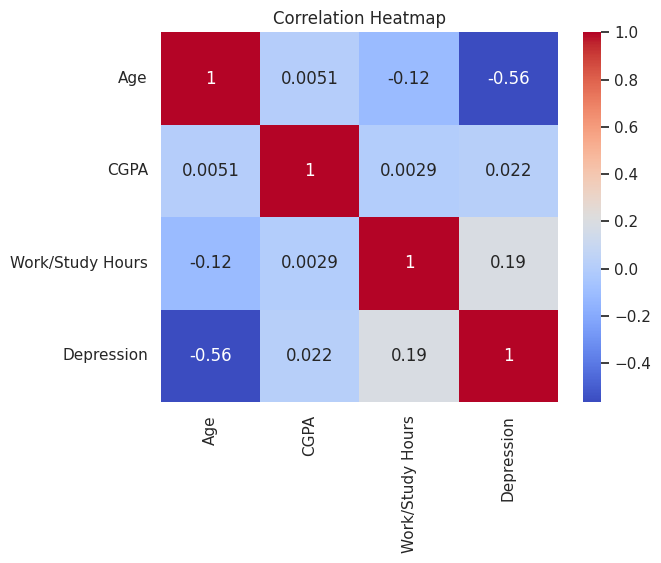

In [18]:
# Heatmap for finding the correlation values of numerical vs numerical variables for checking the strength and direction of variables relation
sns.heatmap(train[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

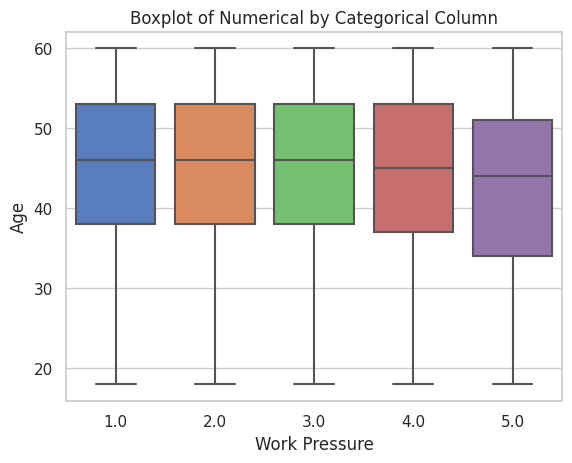

In [19]:
sns.boxplot(x='Work Pressure', y='Age', data=train)
plt.title('Boxplot of Numerical by Categorical Column')
plt.show()

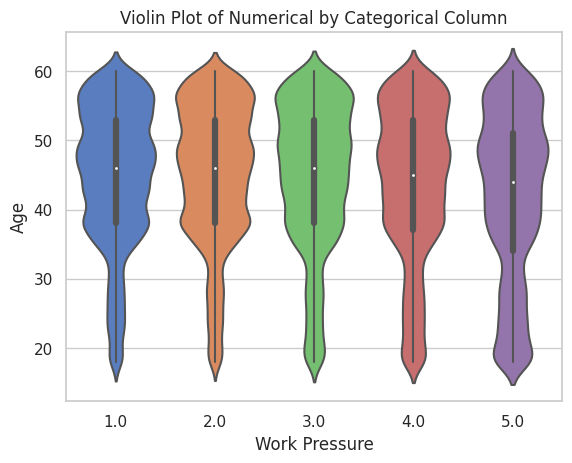

In [20]:
sns.violinplot(x='Work Pressure', y='Age', data=train)
plt.title('Violin Plot of Numerical by Categorical Column')
plt.show()

## Outlier detection

In [21]:
# z_scores = np.abs(stats.zscore(train['CGPA']))
# outliers = train[z_scores]
# outliers

In [22]:
# Q1 = train['CGPA'].quantile(0.25)
# Q3 = train['CGPA'].quantile(0.75)
# IQR = Q3 - Q1
# outliers = train[(train['CGPA'] < Q1 - 1.5 * IQR) | (train['CGPA'] > Q3 + 1.5 * IQR)]
# outliers